In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import powerbox as pbox

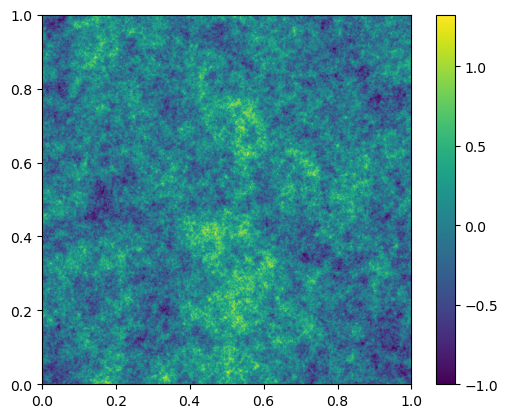

In [2]:
pb = pbox.PowerBox(
    N=512,                     # Number of grid-points in the box
    dim=2,                     # 2D box
    pk = lambda k: 0.1*k**-2., # The power-spectrum
    boxlength = 1.0,           # Size of the box (sets the units of k in pk)
    seed = 1010,               # Set a seed to ensure the box looks the same every time (optional)
    ensure_physical=True       # ** Ensure the delta_x is a physically valid over-density **
)


plt.imshow(pb.delta_x(),extent=(0,1,0,1))
plt.colorbar()
plt.show()

### Primordial Powerspec

$$\begin{align} \\
\mathcal{P}_{prim}(k) = A_s \left(\cfrac{k}{k_0}\right)^{n_s}
\end{align}$$


In [153]:
def PrimordialPowerspec(A_s, n_s, k0, mink, Ngrid):
    boxlen = 2*np.pi/mink
    maxk = 2*np.pi/(boxlen/Ngrid)
    print(f"A_s = {A_s}, n_s = {n_s}, k0 = {k0}, boxlength = {boxlen}, maxk = {maxk}")
    print("Creating a box...")
    pb = pbox.PowerBox(
        N=Ngrid,                     # Number of grid-points in the box
        dim=2,                     # 2D box
        pk = lambda k: A_s*(k/k0)**(n_s-1), # The power-spectrum
        boxlength = boxlen,           # Size of the box (sets the units of k in pk)
        seed = 1010,               # Set a seed to ensure the box looks the same every time (optional)
    ensure_physical=True       # ** Ensure the delta_x is a physically valid over-density **    
    )
    return pb

A_s = 1e-09, n_s = 1, k0 = 0.05, boxlength = 6283.185307179586, maxk = 1.024
Creating a box...


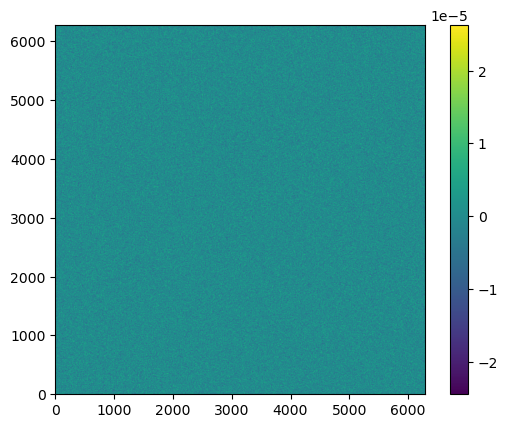

In [162]:
A_s = 1e-9; n_s = 1; k0 = 0.05; mink = 1e-3; Ngrid = 1024
pb = PrimordialPowerspec(A_s, n_s, k0, mink, Ngrid)
boxlen = 2*np.pi/mink
plt.imshow(pb.delta_x(),extent=(0,boxlen,0,boxlen))
plt.colorbar()
plt.show()

A_s = 1e-09, n_s = 0.96, k0 = 0.05, boxlength = 6283.185307179586, maxk = 1.024
Creating a box...


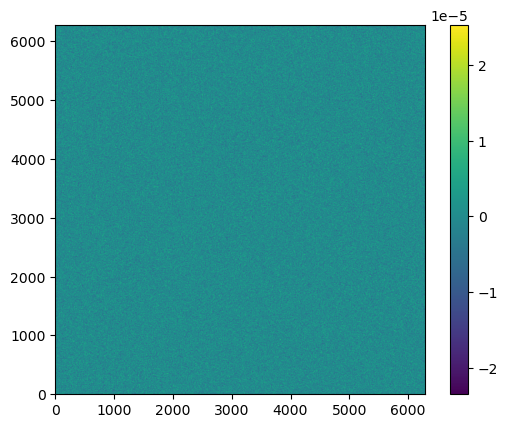

In [163]:
A_s2 = 1e-9; n_s2 = 0.96;k0 = 0.05; mink = 1e-3; Ngrid = 1024
pb2 = PrimordialPowerspec(A_s2, n_s2, k0, mink, Ngrid)
plt.imshow(pb2.delta_x(),extent=(0,boxlen,0,boxlen))
plt.colorbar()
plt.show()

In [164]:
from powerbox import get_power

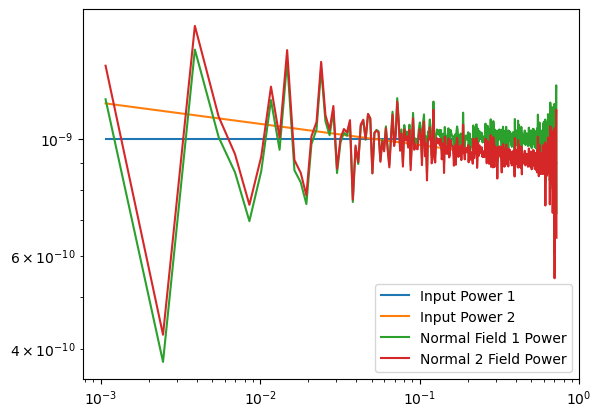

In [166]:
p_k_field, bins_field = get_power(pb.delta_x(), pb.boxlength)
p2_k_field, bins2_field = get_power(pb2.delta_x(), pb2.boxlength)
plt.plot(bins_field, A_s*(bins_field/k0)**(n_s-1), label="Input Power 1")
plt.plot(bins2_field, A_s2*(bins2_field/k0)**(n_s2-1), label="Input Power 2")
plt.plot(bins_field, p_k_field,label="Normal Field 1 Power")
plt.plot(bins2_field, p2_k_field,label="Normal 2 Field Power")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

### Matter Power spectrum

In [5]:
import camb
from camb import model, initialpower

# 1.  H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)
pars.set_matter_power(redshifts=[0.0], kmax=2.0)
# Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=2., npoints=400)

# Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=2., npoints=400)

print('sigma 8 values at z=0:', results.get_sigma8())

sigma 8 values at z=0: [0.80309397]


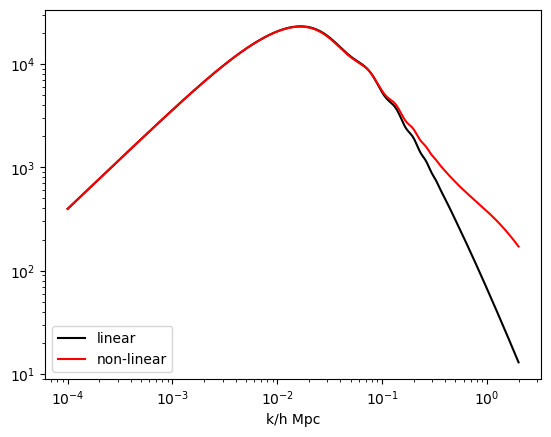

In [6]:
for i, (redshift, line) in enumerate(zip(z, ['-'])):
    plt.loglog(kh, pk[i, :], color='k', ls=line)
    plt.loglog(kh_nonlin, pk_nonlin[i, :], color='r', ls=line)
plt.xlabel('k/h Mpc')
plt.legend(['linear', 'non-linear'], loc='lower left')
#plt.title('Matter power at z=%s and z= %s' % tuple(z))
plt.show()

In [171]:
from scipy.interpolate import make_interp_spline

spline_lin = make_interp_spline(kh, pk[0,:], k=2)
spline_nonlin = make_interp_spline(kh_nonlin, pk_nonlin[0,:], k=2)

boxlength = 628.3185307179587, maxk = 1.28, mink = 0.01, maxlen = 4.908738521234052


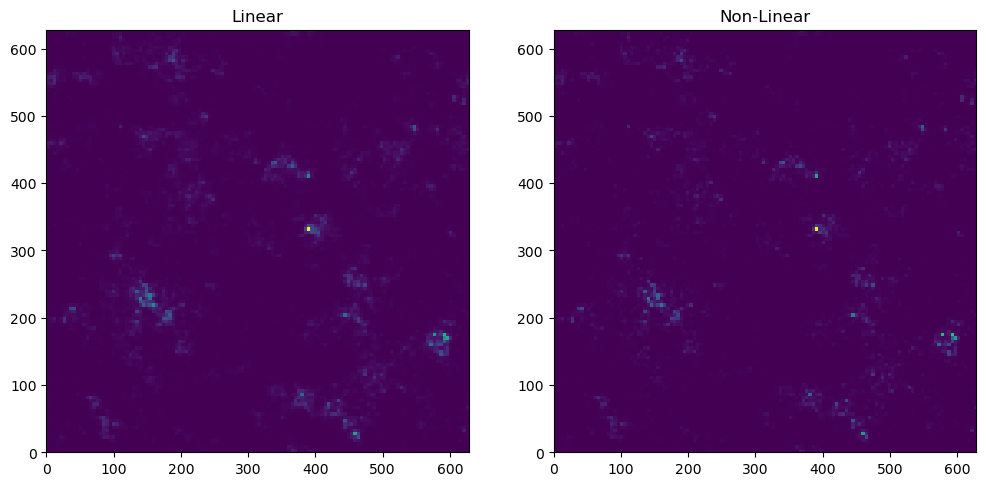

In [172]:
mink = 1e-2
Ngrid=128
boxlen = 2*np.pi/mink
maxk = 2*np.pi/(boxlen/Ngrid)
maxlen = 2*np.pi/maxk
print(f"boxlength = {boxlen}, maxk = {maxk}, mink = {mink}, maxlen = {maxlen}")
pb_lin = pbox.LogNormalPowerBox(
    N=Ngrid,                     # Number of grid-points in the box
    dim=2,                     # 2D box
    pk = lambda k: spline_lin(k), # The power-spectrum
    boxlength = boxlen,           # Size of the box (sets the units of k in pk)
    seed = 1010,               # Set a seed to ensure the box looks the same every time (optional)
    ensure_physical=True       # ** Ensure the delta_x is a physically valid over-density **
)
pb_nonlin = pbox.LogNormalPowerBox(
    N=Ngrid,                     # Number of grid-points in the box
    dim=2,                     # 2D box
    pk = lambda k: spline_nonlin(k), # The power-spectrum
    boxlength = boxlen,           # Size of the box (sets the units of k
    seed = 1010,               # Set a seed to ensure the box looks the same every time (optional)
    ensure_physical=True       # ** Ensure the delta_x is a physically valid over-density **
)
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(pb_lin.delta_x(),extent=(0, boxlen,0,boxlen), origin='lower')
ax[0].set_title("Linear")
ax[1].imshow(pb_nonlin.delta_x(),extent=(0, boxlen,0,boxlen), origin='lower')
ax[1].set_title("Non-Linear")
plt.show()

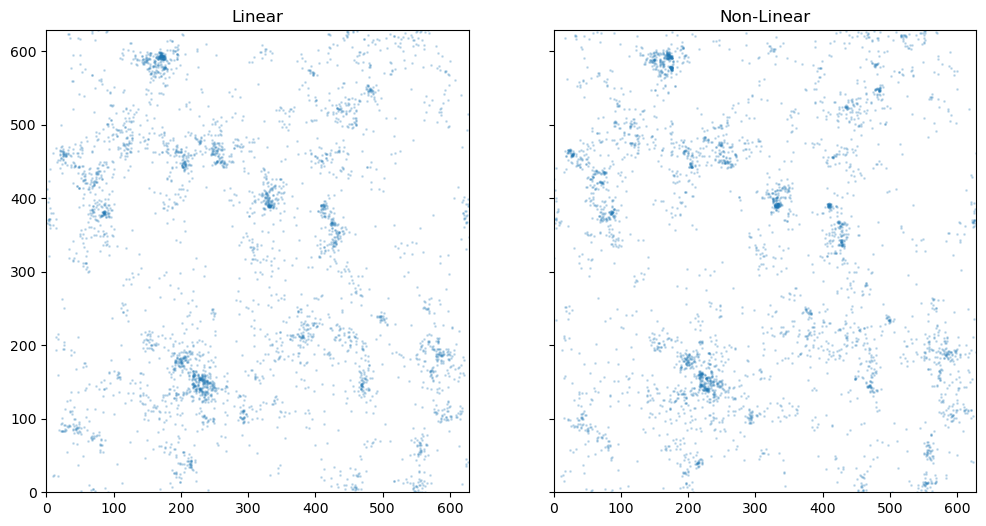

In [152]:
fig, ax = plt.subplots(1,2, sharex=True,sharey=True,gridspec_kw={"hspace":0}, subplot_kw={"ylim":(0,boxlen),"xlim":(0,boxlen)}, figsize=(12,6))
ax[0].set_title("Linear")
ax[1].set_title("Non-Linear")
# Create a discrete sample using the PowerBox instance.
samples = pb_lin.create_discrete_sample(nbar=1e-2,      # nbar specifies the number density
                                    min_at_zero=True  # by default the samples are centred at 0. This shifts them to be positive.
                                   )
ln_samples = pb_nonlin.create_discrete_sample(nbar=1e-2, min_at_zero=True)

# Plot the samples
ax[0].scatter(samples[:,0],samples[:,1], alpha=0.2,s=1)
ax[1].scatter(ln_samples[:,0],ln_samples[:,1],alpha=0.2,s=1)
plt.show()

In [7]:
# 2. H0=67.5, ombh2=0.022, omch2=0.3, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965
pars2 = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.3, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)
pars2.set_matter_power(redshifts=[0.0], kmax=2.0)
# Linear spectra
pars2.NonLinear = model.NonLinear_none
results2 = camb.get_results(pars2)
kh2, z2, pk2 = results2.get_matter_power_spectrum(minkh=1e-4, maxkh=2., npoints=400)

# Non-Linear spectra (Halofit)
pars2.NonLinear = model.NonLinear_both
results2.calc_power_spectra(pars2)
kh2_nonlin, z2_nonlin, pk2_nonlin = results2.get_matter_power_spectrum(minkh=1e-4, maxkh=2., npoints=400)

print('sigma 8 values at z=0:', results2.get_sigma8())

sigma 8 values at z=0: [1.25246178]


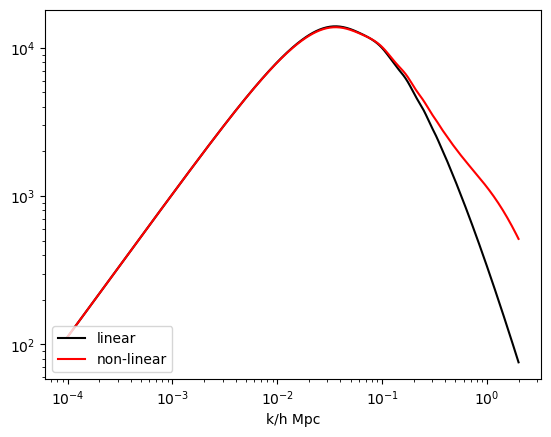

In [8]:
for i, (redshift, line) in enumerate(zip(z, ['-'])):
    plt.loglog(kh2, pk2[i, :], color='k', ls=line)
    plt.loglog(kh2_nonlin, pk2_nonlin[i, :], color='r', ls=line)
plt.xlabel('k/h Mpc')
plt.legend(['linear', 'non-linear'], loc='lower left')
#plt.title('Matter power at z=%s and z= %s' % tuple(z))
plt.show()

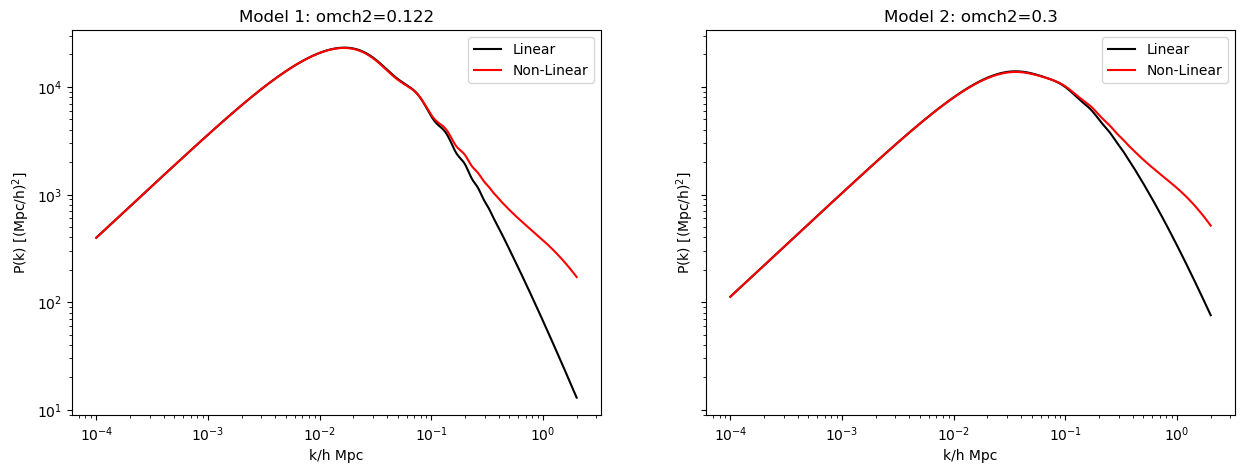

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True, sharey=True)
ax[0].loglog(kh, pk[0,:], color='k', label='Linear')
ax[0].loglog(kh_nonlin, pk_nonlin[0,:], color='r', label='Non-Linear')
ax[0].set_xlabel('k/h Mpc')
ax[0].set_ylabel('P(k) [(Mpc/h)$^2$]')
ax[0].legend()
ax[0].set_title('Model 1: omch2=0.122')
ax[1].loglog(kh2, pk2[0,:], color='k', label='Linear')
ax[1].loglog(kh2_nonlin, pk2_nonlin[0,:], color='r', label='Non-Linear')
ax[1].set_xlabel('k/h Mpc')
ax[1].set_ylabel('P(k) [(Mpc/h)$^2$]')
ax[1].legend()
ax[1].set_title('Model 2: omch2=0.3')
plt.show()

boxlength = 628.3185307179587, maxk = 1.28, mink = 0.01, maxlen = 4.908738521234052


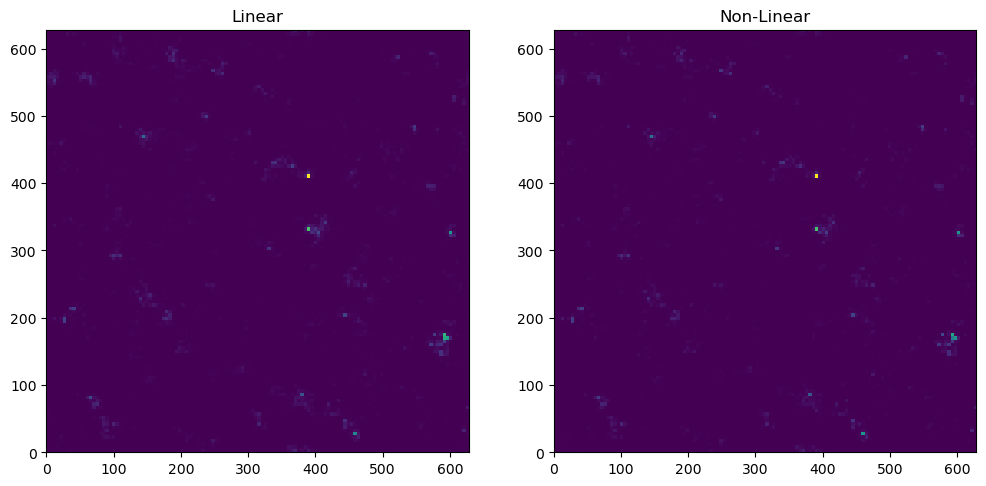

In [ ]:
spline2_lin = make_interp_spline(kh2, pk2[0,:], k=2)
spline2_nonlin = make_interp_spline(kh2_nonlin, pk2_nonlin[0,:], k=2)

mink = 1e-2
Ngrid=128
boxlen = 2*np.pi/mink
maxk = 2*np.pi/(boxlen/Ngrid)
maxlen = 2*np.pi/maxk
print(f"boxlength = {boxlen}, maxk = {maxk}, mink = {mink}, maxlen = {maxlen}")
pb2_lin = pbox.LogNormalPowerBox(
    N=Ngrid,                     # Number of grid-points in the box
    dim=2,                     # 2D box
    pk = lambda k: spline2_lin(k), # The power-spectrum
    boxlength = boxlen,           # Size of the box (sets the units of k in pk)
    seed = 1010,               # Set a seed to ensure the box looks the same every time (optional)
    ensure_physical=True       # ** Ensure the delta_x is a physically valid over-density **
)
pb2_nonlin = pbox.LogNormalPowerBox(
    N=Ngrid,                     # Number of grid-points in the box
    dim=2,                     # 2D box
    pk = lambda k: spline2_nonlin(k), # The power-spectrum
    boxlength = boxlen,           # Size of the box (sets the units of k
    seed = 1010,               # Set a seed to ensure the box looks the same every time (optional)
    ensure_physical=True       # ** Ensure the delta_x is a physically valid over-density **
)
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(pb2_lin.delta_x(),extent=(0, boxlen,0,boxlen), origin='lower')
ax[0].set_title("Linear")
ax[1].imshow(pb2_nonlin.delta_x(),extent=(0, boxlen,0,boxlen), origin='lower')
ax[1].set_title("Non-Linear")
plt.show()

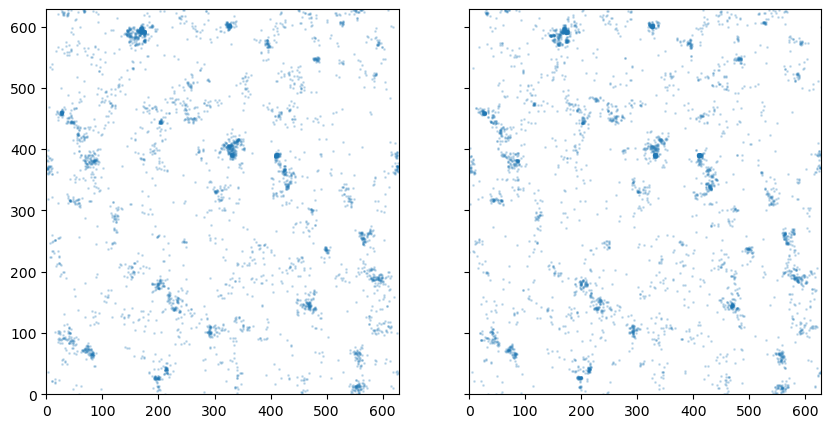

In [176]:
fig, ax = plt.subplots(1,2, sharex=True,sharey=True,gridspec_kw={"hspace":0}, subplot_kw={"ylim":(0,boxlen),"xlim":(0,boxlen)}, figsize=(10,5))

# Create a discrete sample using the PowerBox instance.
samples = pb2_lin.create_discrete_sample(nbar=1e-2,      # nbar specifies the number density
                                    min_at_zero=True  # by default the samples are centred at 0. This shifts them to be positive.
                                   )
ln_samples = pb2_nonlin.create_discrete_sample(nbar=1e-2, min_at_zero=True)

# Plot the samples
ax[0].scatter(samples[:,0],samples[:,1], alpha=0.2,s=1)
ax[1].scatter(ln_samples[:,0],ln_samples[:,1],alpha=0.2,s=1)
plt.show()